In [1]:
import numpy as np
import matplotlib.pyplot as plt
from comp_optics_utilities import *

#Define units
meter = 1
millimeter = 10** -3 * meter
nanometer = 10** -9 * meter



In [121]:
#A new propagation, the only change relative to the Fraunhofer propagation is the quadratic phases
def propagate_fresnel(coordinates, A, _lambda, L):
    #scale the input coordinates correctly, len(coordinates) is the number of samples N
    propagated_coordinates = coordinates * _lambda * L / (np.max(coordinates)-np.min(coordinates))**2 * len(coordinates)
    #apply the FFT (fast DFT) to the field to find the diffraction pattern
    #np.fft.fftshift swaps around the indices of the returned fft from np.fft.fft, since the
    #returned indices before fftshift are not in the normal convenient order physicists like to deal with
    
    #Fresnel quadratic phase factors
    B_fp = np.exp(1.0j * np.pi / _lambda / L * (propagated_coordinates)**2)
    B_f = np.exp(1.0j * np.pi / _lambda / L * (coordinates)**2)

    propagated_amplitude = B_fp * 1/(1.0j * _lambda * L) * np.exp(1.0j*2*np.pi/_lambda * L) * (np.fft.fftshift((np.fft.fft(np.fft.fftshift(A * B_f)))))
    
    #return the calculted propagation
    return propagated_coordinates, propagated_amplitude

In [122]:
def boxcar(x, w):
    return np.logical_and((x) > -w/2, (x) < w/2)

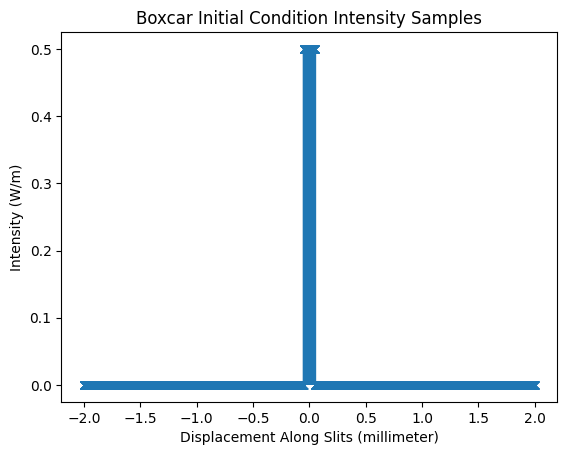

In [123]:
l = 2 * millimeter
_lambda = 500 * nanometer
L = 0.003 * meter
coordinates = np.linspace(-l, l, 4096)
boxcar_amplitude = boxcar(coordinates, 0.1 * millimeter) #A 0.1mm boxcar initial condition at the z=0 plane
plot_intensity_1d(coordinates,triple_slit_amplitude, "Boxcar Initial Condition")

TASK: Propagate the given boxcar pattern given distances 0.3m, 0.03m, 0.003m, 0.0003m, with wavelength 500nm
with the Fresnel and Fraunhofer single Fourier transform propagations so that they may be compared.
you should see the failure of nearfield variation appear when an imperfect boxcar shape forms in the near field Fresnel result. In comparison the Fraunhofer result is always shaped like the Fourier transform of the input amplitude, and does not approach a boxcar.
HINT: You are making 8 plots, you may write a function to make a plot and call it 8 times. A lineplot is reccomended

QUESTION: When the Fresnel propagation approaches a boxcar shape for short enough distances, what physical dimension
derived from the simulation best confirms it is the boxcar we started with? 
HINT: You should be able to read it off from the initial condition plot, and propagation plot for short enough
propagation distance

QUESTION: For each of the four distances, state which approximations (of Fraunhofer and Fresnel) if any are valid
HINT: The width of the boxcar tells you the maximum unprimed coordinate difference for nonzero amplitude in the transverse axes, which is used in the statement of each approximation, along with the length of z-propagation L
HINT: The Fraunhofer phase error is a^2/(L * lambda), so a^2/(L * lambda) << 1
The Fresnel phase error is (a^4)/(8 * L^3 * lambda), so (a^4)/(8 * L^3 * lambda) << 1